# Customer Segmentation Project

In [152]:
import numpy as np
import pandas as pd

# Loading data

In [153]:
df = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\projects\ML projects\clustering\marketing_campaign.csv', sep ="\t")

In [157]:
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

### importing the required **packages**

In [158]:
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import sys
from sklearn.decomposition import PCA
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


# Data cleaning

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#To remove the na value we are using
df =df.dropna()
print(f'After dropping the NA values from the data, the size is of the data is {len(df)}')

After dropping the NA values from the data, the size is of the data is 2216


In the next step, I am going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record. 

Thus to get the values I must check the newest and oldest recorded dates. 

In [162]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = 'mixed')
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)
    
print('the newest cutomers enrollment date in the record is:',max(dates))
print('the oldest customer enrollment date in the record is :', min(dates))


the newest cutomers enrollment date in the record is: 2014-12-06
the oldest customer enrollment date in the record is : 2012-01-08


In [163]:
days =[]
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df['Customer_For']  = days
df['Custome_For'] = pd.to_numeric(df['Customer_For'], errors = 'coerce')

**In the next bit, I will be performing the following steps to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [ ]:

df['Age'] = 2021-df['Year_Birth']
df['Spent'] = df['MntFishProducts'] + df['MntFruits'] +df['MntGoldProds'] + df['MntMeatProducts'] +df['MntSweetProducts'] + df['MntWines']
df['Living_With'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Living_With'].replace({'Alone' : 1, 'Partner' : 2}) + df['Children']
df['Is_parent'] = np.where(df.Children>0,1,0)
df['Education'] = df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df = df.rename(columns = {'MntWines': 'Wines', 'MntFruits' : 'fruits', 'MntGoldProds' : 'Gold', 'MntFishProducts' : 'Fish', 'MntMeatProducts' : 'Meat', 'MntSweetProducts' : 'Sweet' })
to_drop = ['Marital_Status','Z_Revenue', 'Z_CostContact', 'Year_Birth', 'ID', 'Dt_Customer']
df = df.drop(to_drop, axis = 1)


In [165]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            fruits         Meat         Fish        Sweet         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp2     Complain     Response                 Customer_For  \
count   2216.000000  2216.000000  2216.000000                         2216   
mean       0.013538     0.009477     0.150271  512 days 00:09:05.848375448   
std        0.115588     0.096907     0.357417  232 days 11:15:24.558024988   
min        0.000000     0.000000     0.000000              0 days 00:00:00   
25%        0.000000     0.000000     0.000000            340 days 00:00:00   
50%        0.000000     0.000000     0.000000            513 days 00:00:00   
75%        0.000000     0.000000     0.000000            686 days 00:00:00   
max        1.000000     1.000000     1.000000           1063 days 00:00:00   

        Custome_For          Age        Spent     Children  Family_Size  \
count  2.216000e+03  2216.000000  2216.000000  2216.000000  2216.000000   
mean   4.423735e+16    52.179603   607.075361     0.947202     2.592509   
std    2.008532e+16    11.985554   602.900476     0.749062     0.905722   
min    0.000000e+00    25.000000     5.000000     0.000000     1.000000   
25%    2.937600e+16    44.000000    69.000000     0.000000     2.000000   
50%    4.432320e+16    51.000000   396.500000     1.000000     3.000000   
75%    5.927040e+16    62.000000  1048.000000     1.000000     3.000000   
max    9.184320e+16   128.000000  2525.000000     3.000000     5.000000   

         Is_parent  
count  2216.000000  
mean      0.714350  
std       0.451825  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 29 columns]

relative plot of some selected features : A Data Subset


<Figure size 800x550 with 0 Axes>

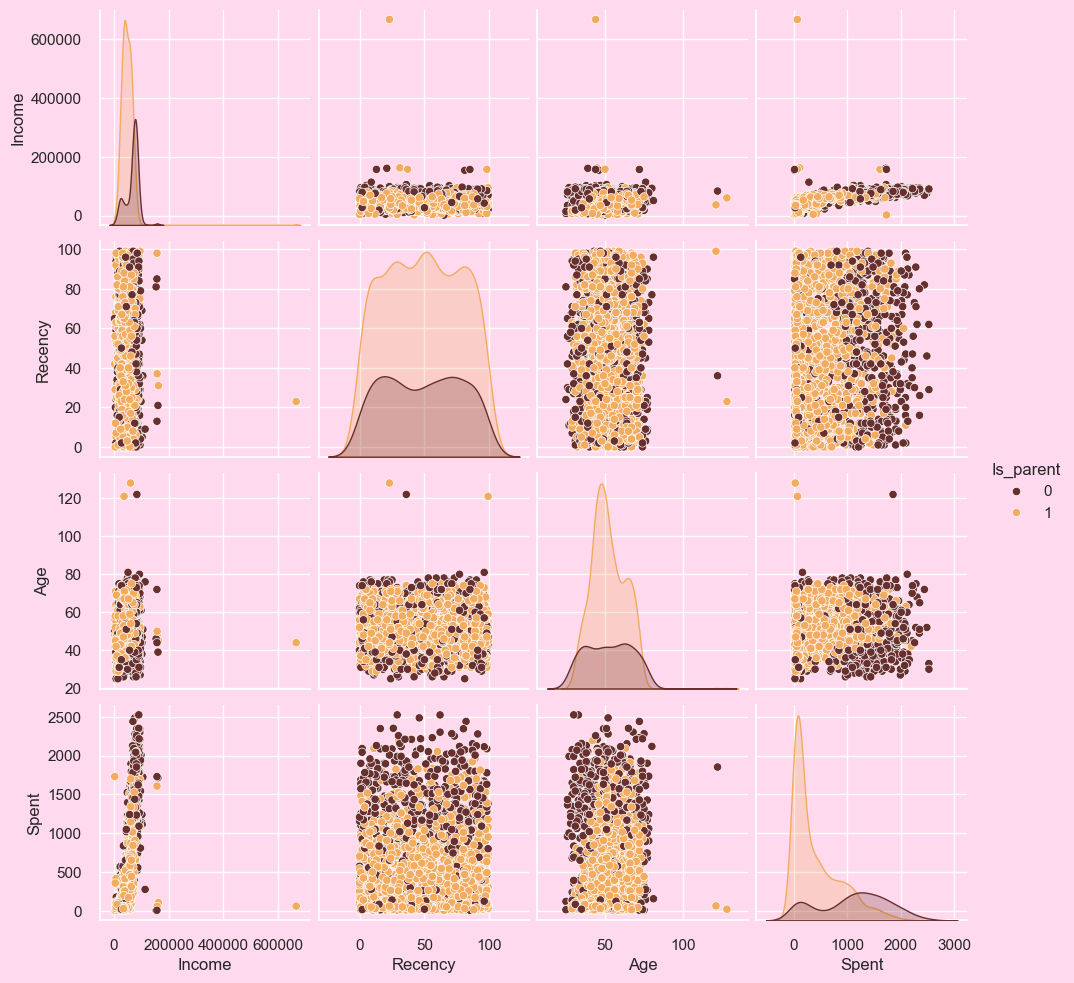

In [166]:
sns.set(rc = {'axes.facecolor' : '#FFD9ED', 'figure.facecolor' : '#FFD9ED'})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
to_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_parent']
print('relative plot of some selected features : A Data Subset')
plt.figure()
sns.pairplot(df[to_plot], hue = 'Is_parent', palette = (["#682F2F","#F3AB60"]))
plt.show()

In [167]:
df = df[(df['Age']<90)]
df = df[(df['Income']<600000)]
print('the total number of data-points after removing the outliers are :',len(df))

the total number of data-points after removing the outliers are : 2212


In [168]:
df['Education'].value_counts()

Education
Graduate         1115
Postgraduate      845
Undergraduate     252
Name: count, dtype: int64

In [169]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# Reshape to 2D before fitting
encoded = ohe.fit_transform(df[['Education']]).toarray()

# Optional: convert to DataFrame with column names
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Education']))

# Join back to original DataFrame
df = pd.concat([df, encoded_df], axis=1).drop(columns=['Education'])


In [170]:
df

Income  Kidhome  Teenhome  Recency  Wines  fruits   Meat   Fish  Sweet  \
0     58138.0      0.0       0.0     58.0  635.0    88.0  546.0  172.0   88.0   
1     46344.0      1.0       1.0     38.0   11.0     1.0    6.0    2.0    1.0   
2     71613.0      0.0       0.0     26.0  426.0    49.0  127.0  111.0   21.0   
3     26646.0      1.0       0.0     26.0   11.0     4.0   20.0   10.0    3.0   
4     58293.0      1.0       0.0     94.0  173.0    43.0  118.0   46.0   27.0   
...       ...      ...       ...      ...    ...     ...    ...    ...    ...   
2061      NaN      NaN       NaN      NaN    NaN     NaN    NaN    NaN    NaN   
2078      NaN      NaN       NaN      NaN    NaN     NaN    NaN    NaN    NaN   
2079      NaN      NaN       NaN      NaN    NaN     NaN    NaN    NaN    NaN   
2081      NaN      NaN       NaN      NaN    NaN     NaN    NaN    NaN    NaN   
2084      NaN      NaN       NaN      NaN    NaN     NaN    NaN    NaN    NaN   

      Gold  ...   Custome_For   Age   Spent  Living_With  Children  \
0     88.0  ...  8.389440e+16  64.0  1617.0        Alone       0.0   
1      6.0  ...  1.080000e+16  67.0    27.0        Alone       2.0   
2     42.0  ...  4.078080e+16  56.0   776.0      Partner       0.0   
3      5.0  ...  5.616000e+15  37.0    53.0      Partner       1.0   
4     15.0  ...  2.773440e+16  40.0   422.0      Partner       1.0   
...    ...  ...           ...   ...     ...          ...       ...   
2061   NaN  ...           NaN   NaN     NaN          NaN       NaN   
2078   NaN  ...           NaN   NaN     NaN          NaN       NaN   
2079   NaN  ...           NaN   NaN     NaN          NaN       NaN   
2081   NaN  ...           NaN   NaN     NaN          NaN       NaN   
2084   NaN  ...           NaN   NaN     NaN          NaN       NaN   

      Family_Size  Is_parent  Education_Graduate  Education_Postgraduate  \
0             1.0        0.0                 1.0                     0.0   
1             3.0        1.0                 1.0                     0.0   
2             2.0        0.0                 1.0                     0.0   
3             3.0        1.0                 1.0                     0.0   
4             3.0        1.0                 0.0                     1.0   
...           ...        ...                 ...                     ...   
2061          NaN        NaN                 1.0                     0.0   
2078          NaN        NaN                 0.0                     0.0   
2079          NaN        NaN                 0.0                     0.0   
2081          NaN        NaN                 1.0                     0.0   
2084          NaN        NaN                 1.0                     0.0   

      Education_Undergraduate  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  
...                       ...  
2061                      0.0  
2078                      1.0  
2079                      1.0  
2081                      0.0  
2084                      0.0  

[2238 rows x 33 columns]

In [171]:
df.dropna(inplace = True)

In [173]:
df

Income  Kidhome  Teenhome  Recency  Wines  fruits   Meat   Fish  Sweet  \
0     58138.0      0.0       0.0     58.0  635.0    88.0  546.0  172.0   88.0   
1     46344.0      1.0       1.0     38.0   11.0     1.0    6.0    2.0    1.0   
2     71613.0      0.0       0.0     26.0  426.0    49.0  127.0  111.0   21.0   
3     26646.0      1.0       0.0     26.0   11.0     4.0   20.0   10.0    3.0   
4     58293.0      1.0       0.0     94.0  173.0    43.0  118.0   46.0   27.0   
...       ...      ...       ...      ...    ...     ...    ...    ...    ...   
2207  32144.0      1.0       1.0     76.0   41.0     0.0   10.0    0.0    0.0   
2208  14918.0      0.0       1.0     52.0    3.0     3.0    3.0   15.0    4.0   
2209  45146.0      1.0       1.0     28.0   33.0     0.0    5.0    0.0    0.0   
2210  41769.0      0.0       1.0     31.0  302.0    29.0  131.0   32.0    0.0   
2211  88325.0      0.0       0.0     42.0  519.0    71.0  860.0   93.0   27.0   

      Gold  ...   Custome_For   Age   Spent  Living_With  Children  \
0     88.0  ...  8.389440e+16  64.0  1617.0        Alone       0.0   
1      6.0  ...  1.080000e+16  67.0    27.0        Alone       2.0   
2     42.0  ...  4.078080e+16  56.0   776.0      Partner       0.0   
3      5.0  ...  5.616000e+15  37.0    53.0      Partner       1.0   
4     15.0  ...  2.773440e+16  40.0   422.0      Partner       1.0   
...    ...  ...           ...   ...     ...          ...       ...   
2207   3.0  ...  2.229120e+16  67.0    54.0      Partner       2.0   
2208  15.0  ...  7.577280e+16  58.0    43.0      Partner       1.0   
2209  15.0  ...  4.397760e+16  58.0    53.0        Alone       2.0   
2210  27.0  ...  5.711040e+16  66.0   521.0        Alone       1.0   
2211  53.0  ...  1.883520e+16  40.0  1623.0      Partner       0.0   

      Family_Size  Is_parent  Education_Graduate  Education_Postgraduate  \
0             1.0        0.0                 1.0                     0.0   
1             3.0        1.0                 1.0                     0.0   
2             2.0        0.0                 1.0                     0.0   
3             3.0        1.0                 1.0                     0.0   
4             3.0        1.0                 0.0                     1.0   
...           ...        ...                 ...                     ...   
2207          4.0        1.0                 1.0                     0.0   
2208          3.0        1.0                 0.0                     1.0   
2209          3.0        1.0                 1.0                     0.0   
2210          2.0        1.0                 0.0                     1.0   
2211          2.0        0.0                 0.0                     1.0   

      Education_Undergraduate  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  
...                       ...  
2207                      0.0  
2208                      0.0  
2209                      0.0  
2210                      0.0  
2211                      0.0  

[2186 rows x 33 columns]

In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Living_With'] = le.fit_transform(df['Living_With'])

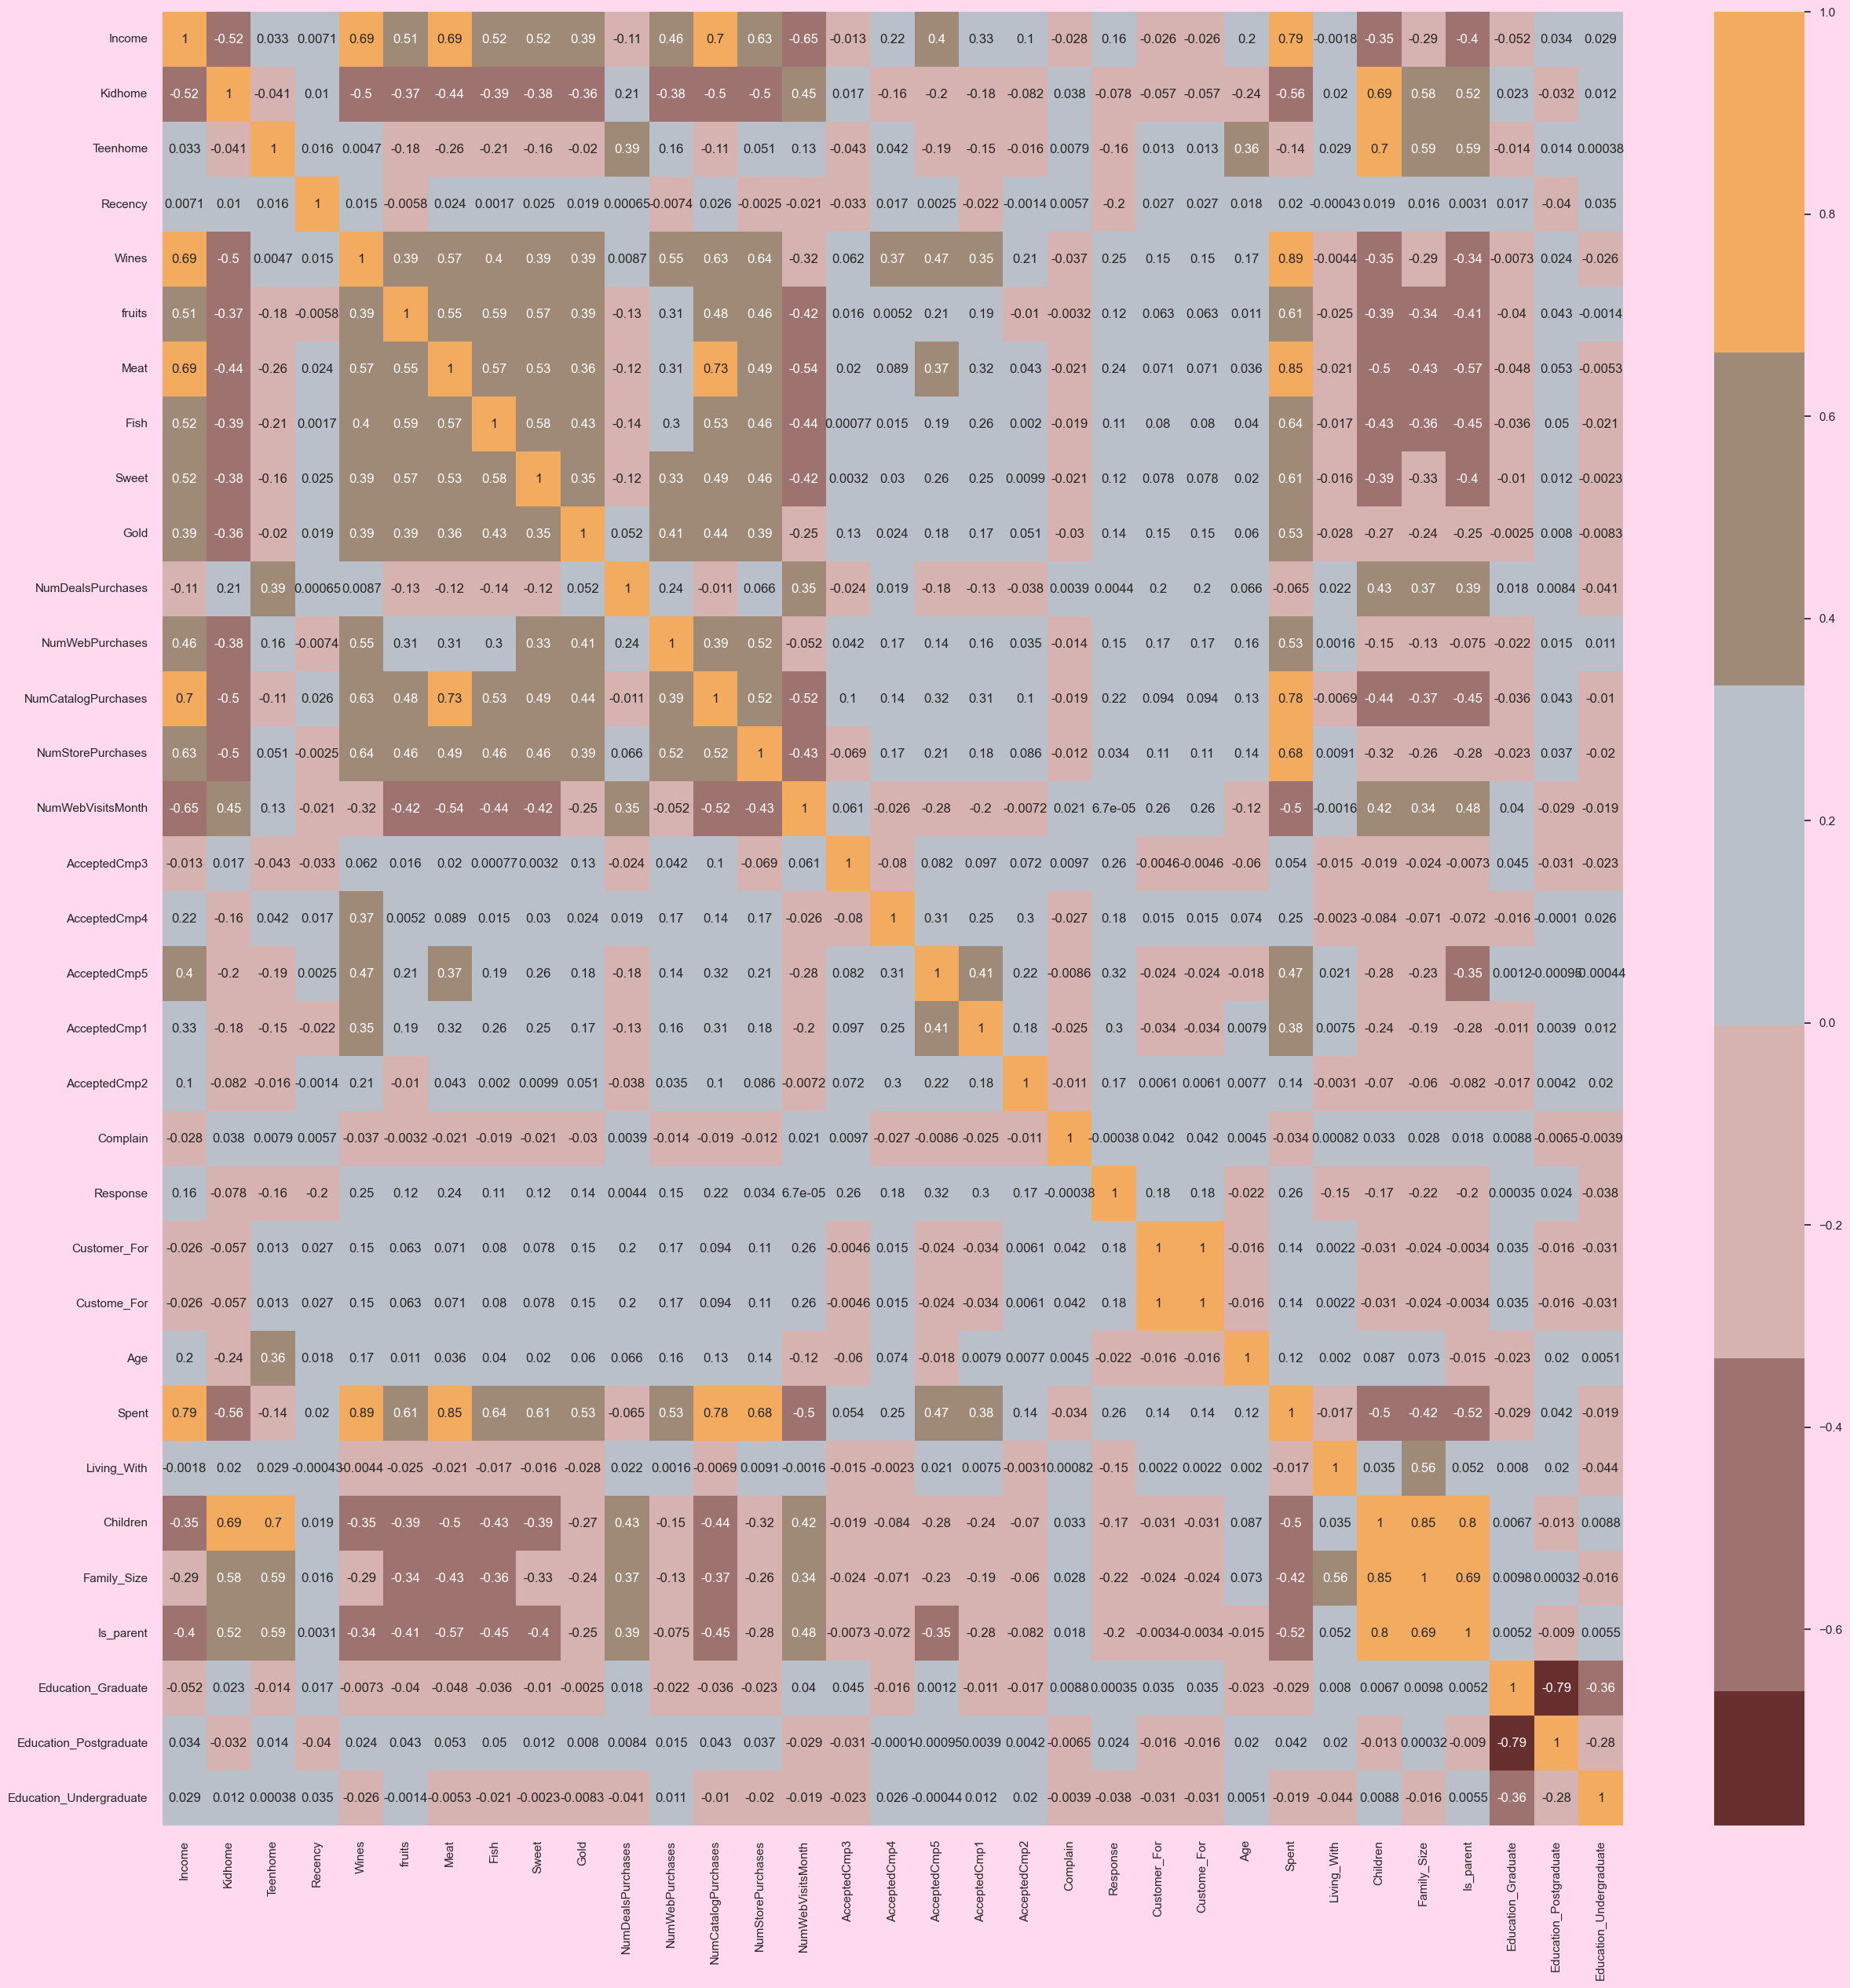

In [179]:
corrmat = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corrmat, annot = True, cmap = cmap, center = 0)
plt.show()

# Data preprocessing
- Encoding 
- Scaling
- Duplicating the data for dimensionality reduction


In [180]:
s= (df.dtypes == 'object')
objects_col = list[s[s].index]
print('Categorical variables in the dataset are:', objects_col)

Categorical variables in the dataset are: list[Index([], dtype='object')]


In [181]:
for i in objects_col:
    df[i]= df[i].apply(le.fit_transform)
print('All features are now numerical')

All features are now numerical


In [184]:
#we are now Creating a copy of data
ds = df.copy()
# now here we are creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#we are applying scaling to out data
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [185]:
#we will use this data for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Income   Kidhome  Teenhome   Recency     Wines    fruits      Meat  \
0  0.329761 -0.821160 -0.929555  0.310077  1.173387  1.704247  1.831834   
1 -0.259225  1.046744  0.909366 -0.380562 -0.979769 -0.672520 -0.853909   
2  1.024870 -0.821160 -0.929555 -0.794945  0.558200  0.669654 -0.054184   
3 -1.292162  1.046744 -0.929555 -0.794945 -0.979769 -0.588634 -0.760608   
4  0.335067  1.046744 -0.929555  1.553226 -0.338949  0.501883 -0.114163   

       Fish     Sweet      Gold  ...  Custome_For       Age     Spent  \
0  2.404636  1.569180  0.923918  ...     1.642653  1.018248  1.634053   
1 -0.688146 -0.654563 -0.764608  ...    -1.602798  1.275121 -1.097410   
2  1.420569 -0.137414 -0.014152  ...    -0.200637  0.333253  0.386809   
3 -0.524135 -0.602849 -0.785454  ...    -1.655314 -1.293609 -1.016339   
4  0.249061  0.017731 -0.576994  ...    -0.920098 -1.036736 -0.171332   

   Living_With  Children  Family_Size  Is_parent  Education_Graduate  \
0    -1.350663 -1.264370    -1.764965  -1.578611            0.991799   
1    -1.350663  1.411247     0.453674   0.633468            0.991799   
2     0.740377 -1.264370    -0.655645  -1.578611            0.991799   
3     0.740377  0.073439     0.453674   0.633468            0.991799   
4     0.740377  0.073439     0.453674   0.633468           -1.008268   

   Education_Postgraduate  Education_Undergraduate  
0               -0.787693                -0.356911  
1               -0.787693                -0.356911  
2               -0.787693                -0.356911  
3               -0.787693                -0.356911  
4                1.269531                -0.356911  

[5 rows x 26 columns]

#  Dimensionality Reduction



In [ ]:
#applying PCA to reduce dimentions to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2186.0 -4.550594e-17  2.952576 -5.370130 -2.680141 -0.770442  2.602325   
col2  2186.0  0.000000e+00  1.756044 -4.709491 -1.349604 -0.199592  1.259012   
col3  2186.0 -8.898036e-17  1.480830 -3.908270 -1.144727 -0.006891  1.093335   

           max  
col1  7.080681  
col2  6.211682  
col3  4.963182

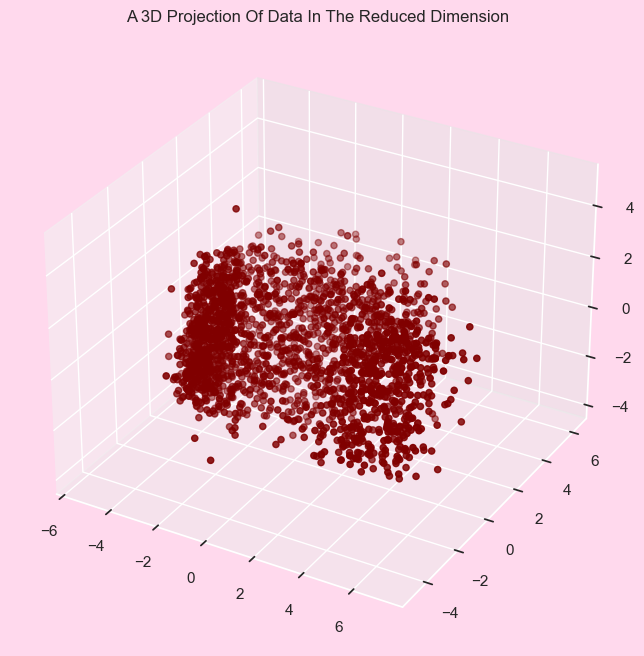

In [187]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Elbow Method to determine the number of clusters to be formed:


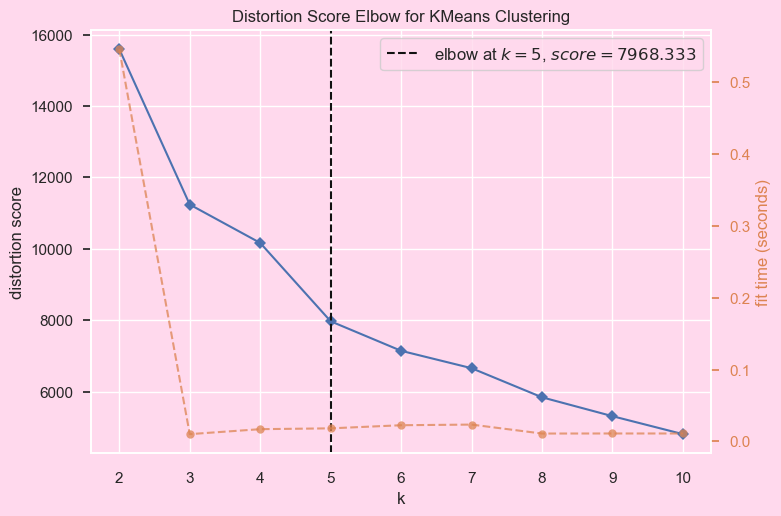

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [188]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#applying the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fitting the model and predicting clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

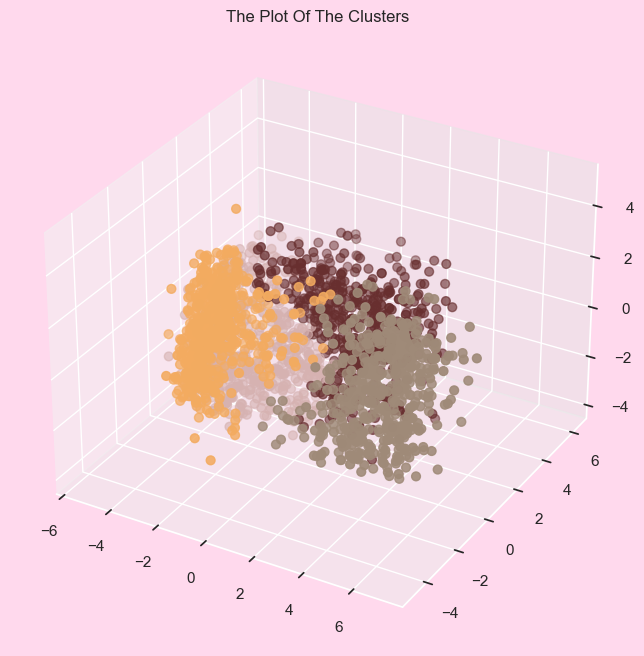

In [191]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating model

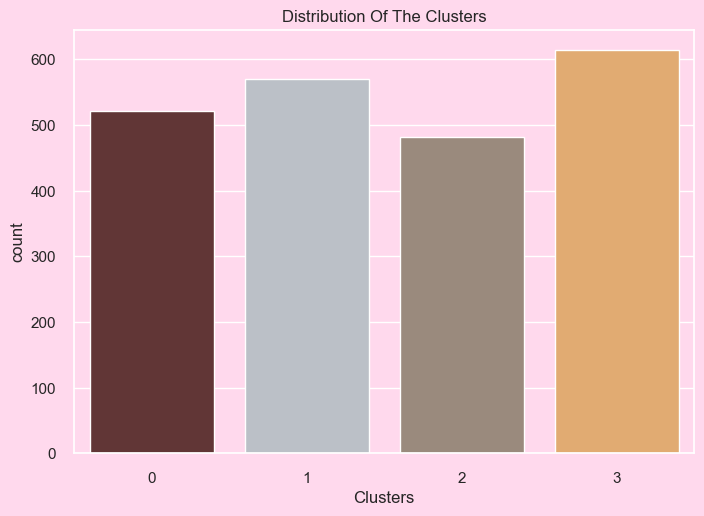

In [193]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

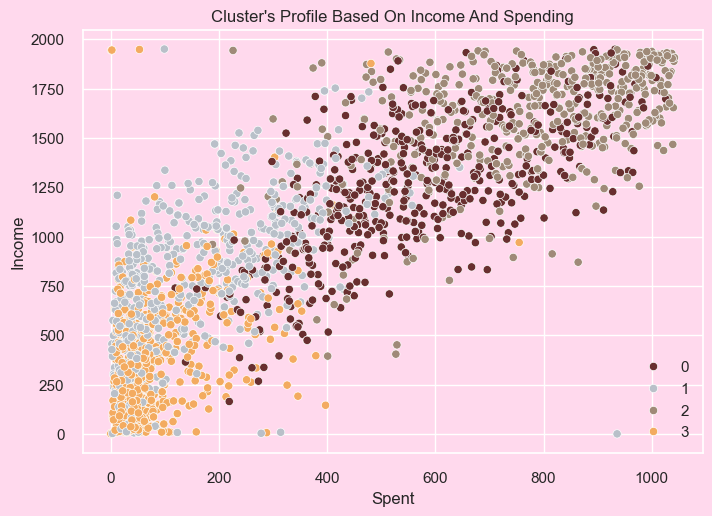

In [196]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# We will show the Income vs Spent clustering pattern


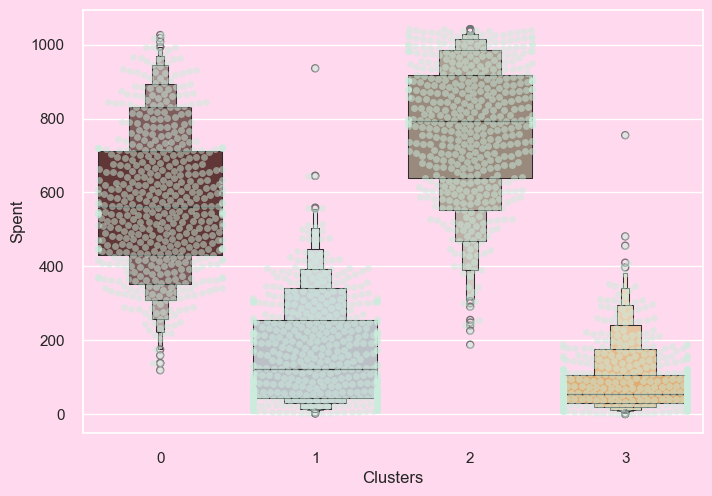

In [199]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()


let us see how our campaign did in the past

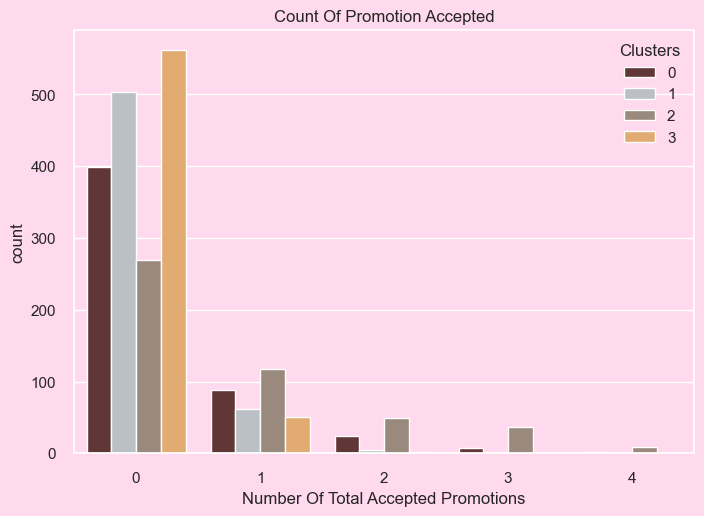

In [200]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

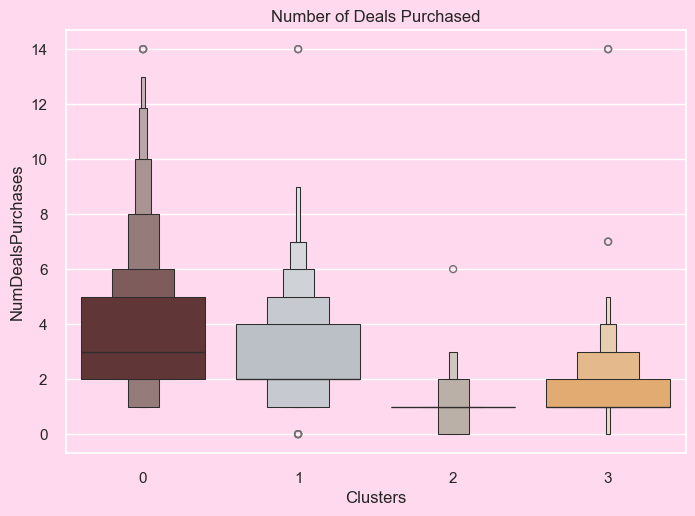

In [202]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. 
However, our star customers cluster 1 are not much into the deals. 
Nothing seems to attract cluster 2 overwhelmingly 

<Figure size 800x550 with 0 Axes>

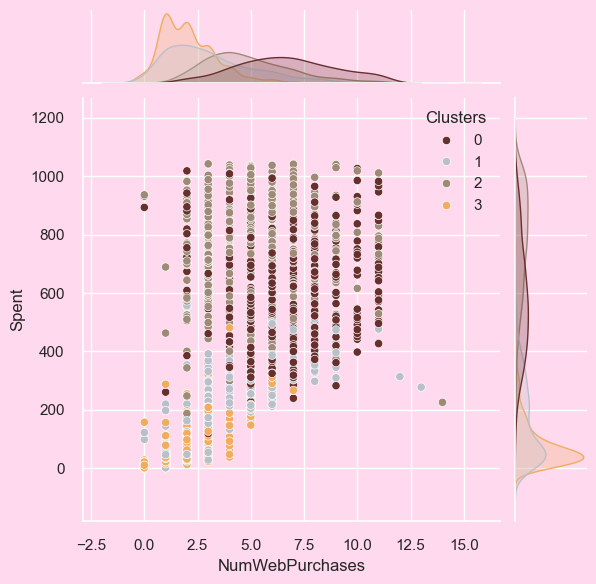

<Figure size 800x550 with 0 Axes>

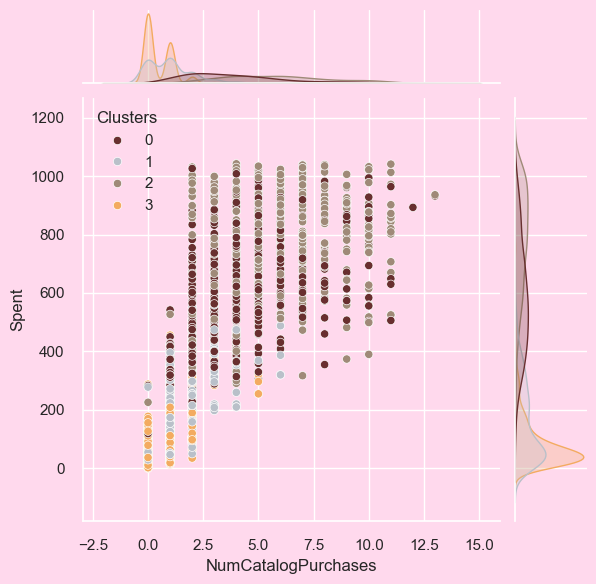

<Figure size 800x550 with 0 Axes>

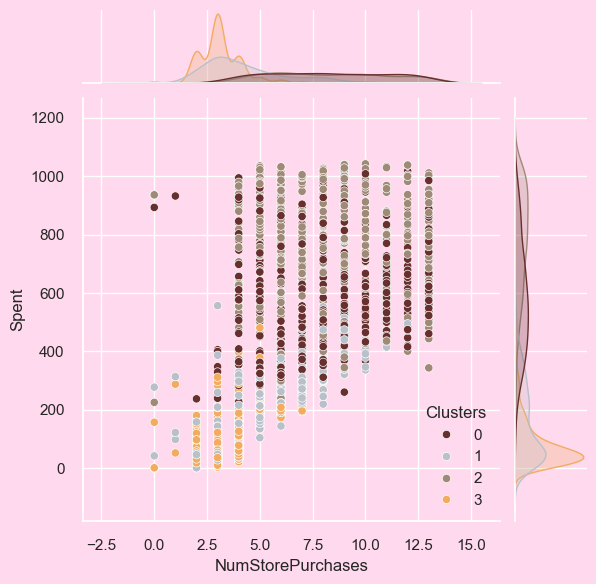

<Figure size 800x550 with 0 Axes>

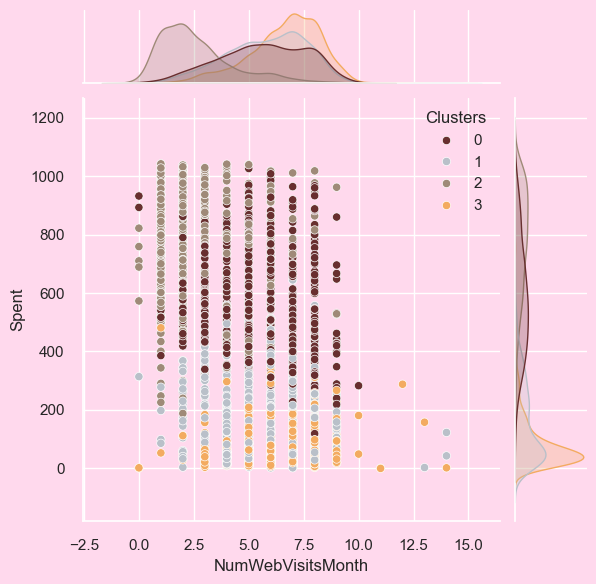

In [204]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=df[i],y = df["Spent"],hue=df["Clusters"], palette= pal)
    plt.show()

## Profiling


<Figure size 800x550 with 0 Axes>

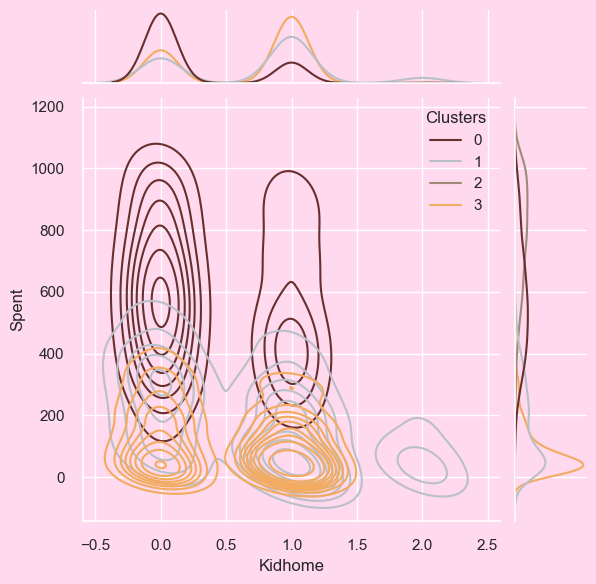

<Figure size 800x550 with 0 Axes>

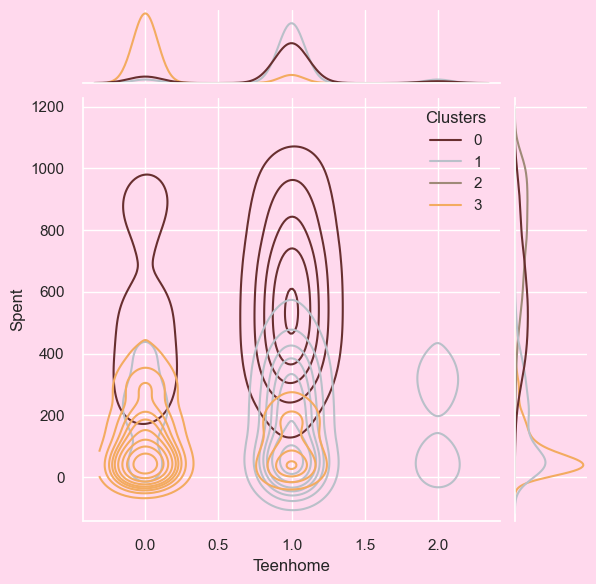

<Figure size 800x550 with 0 Axes>

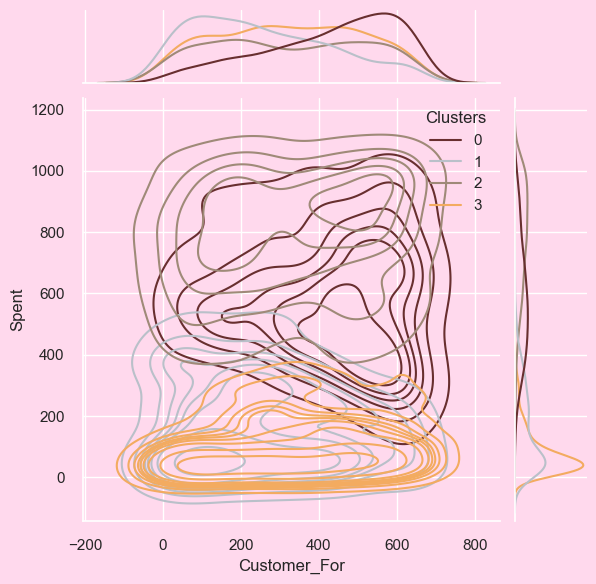

<Figure size 800x550 with 0 Axes>

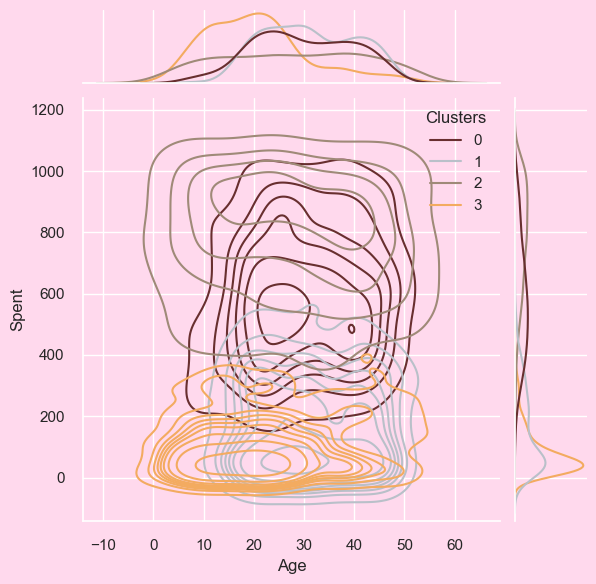

<Figure size 800x550 with 0 Axes>

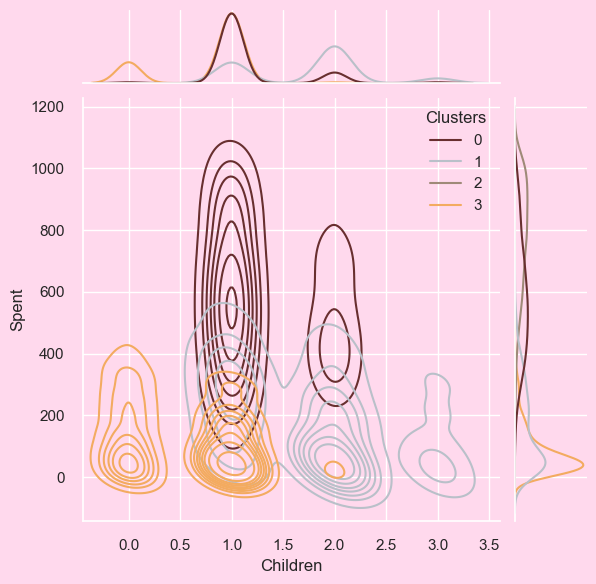

<Figure size 800x550 with 0 Axes>

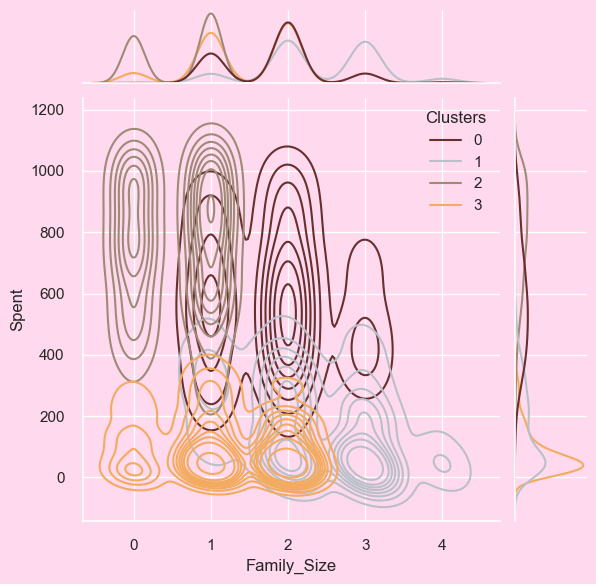

<Figure size 800x550 with 0 Axes>

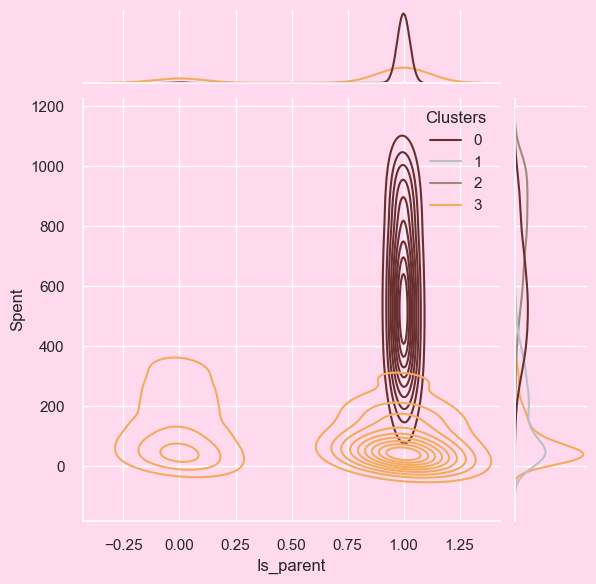

<Figure size 800x550 with 0 Axes>

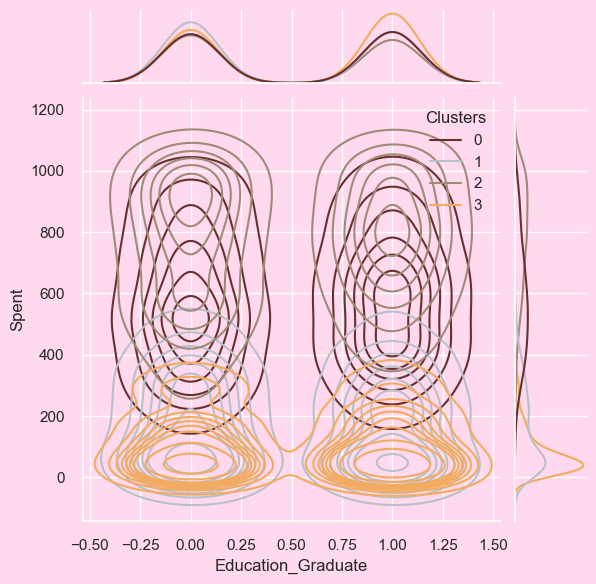

<Figure size 800x550 with 0 Axes>

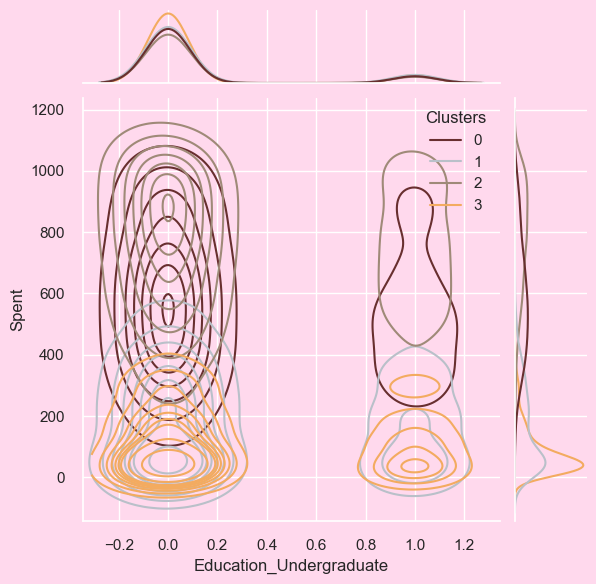

<Figure size 800x550 with 0 Axes>

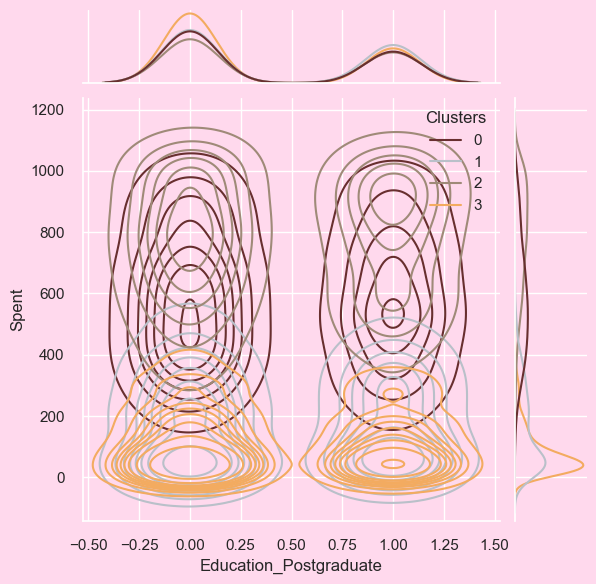

<Figure size 800x550 with 0 Axes>

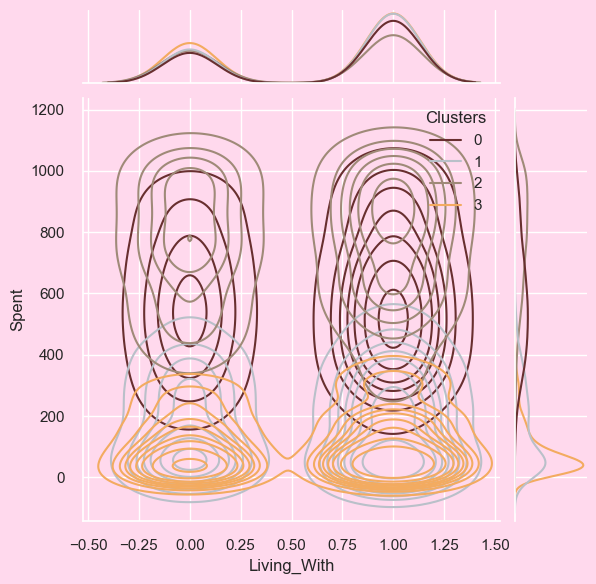

In [210]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_parent", "Education_Graduate",'Education_Undergraduate', 'Education_Postgraduate',"Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()


SyntaxError: invalid syntax (938597365.py, line 1)

<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

In this project, I performed unsupervised clustering. 
I did use dimensionality reduction followed by agglomerative clustering. 
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. 
This can be used in planning better marketing strategies. 

**<span style="color:#682F2F;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#682F2F;">If you have any questions, feel free to comment!</span>**

**<span style="color:#682F2F;"> Best Wishes!</span>**

<a id="10"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>
